In [130]:
import create_r3d_functions as c3d

# See below on c5d
# length of side of grid is 7.24 AU
# the star is within 1au and 2 au approximately
# cell size is 0.023 AU
c3d.create_grid(7.24,20,[4,3,2,1])



Creating amr_grid with octree refinement.
Length of total side of whole grid: 7.24 AU
Number of base cells along one side of the grid: 20
Distances to refinement limits from centrum: [4, 3, 2, 1] AU
Number refinements: 4
Size of base cell: 0.362 AU
Child cell size 1: 0.181 AU
Child cell size 2: 0.0905 AU
Child cell size 3: 0.04525 AU
Child cell size 4: 0.022625 AU
Writing amr_grid.inp
Finished amr_grid.inp
Writing grid_distances.csv and grid_cellsizes.csv
(Not necessary for Radmc3d, but useful for pre/portprocessing of your model. They have the same order as dust_densities.inp)
Finished grid_distances.csv
Finished grid_cellsizes.csv
Writing grid_info.txt
Finished grid_info.txt
Create grid: done.



In [2]:
from bhmie.makedustopac import *

compute_opac_mie()



In [2]:
import analyze_r3d_functions as a3d
import numpy as np

wavelengths,nwave = a3d.load_wavelengthgrid()

print(
    np.array([
        wavelength*1e-4 for wavelength in wavelengths
    ])
)

[1.00000000e-05 1.10520985e-05 1.22148882e-05 1.35000147e-05
 1.49203493e-05 1.64901170e-05 1.82250398e-05 2.01424935e-05
 2.22616822e-05 2.46038305e-05 2.71923959e-05 3.00533038e-05
 3.32152074e-05 3.67097745e-05 4.05720044e-05 4.48405790e-05
 4.95582496e-05 5.47722657e-05 6.05348477e-05 6.69037100e-05
 7.39426394e-05 8.17221335e-05 9.03201070e-05 9.98226721e-05
 1.10325001e-04 1.21932277e-04 1.34760754e-04 1.48938913e-04
 1.64608754e-04 1.81927217e-04 2.01067752e-04 2.22222061e-04
 2.45602011e-04 2.71441762e-04 3.00000109e-04 3.31563076e-04
 3.66446778e-04 4.05000589e-04 4.47610641e-04 4.94703690e-04
 5.46751392e-04 6.04275025e-04 6.67850710e-04 7.38115184e-04
 8.15772173e-04 9.01599442e-04 9.96456586e-04 1.10129364e-03
 1.21716057e-03 1.34521786e-03 1.48674803e-03 1.64316857e-03
 1.81604609e-03 2.00711203e-03 2.21827999e-03 2.45166490e-03
 2.70960420e-03 2.99468125e-03 3.30975122e-03 3.65796965e-03
 4.04282410e-03 4.46816902e-03 4.93826442e-03 5.45781849e-03
 6.03203476e-03 6.666664

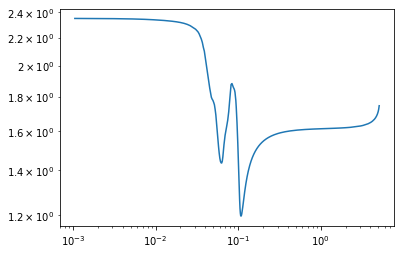

In [2]:
import numpy as np
import matplotlib.pyplot as plt

mg2sio4 = np.loadtxt('../bhmie/lnk/mg2sio4.lnk',delimiter=' ')

plt.plot(1/mg2sio4[:,0],mg2sio4[:,1])
plt.xscale('log')
plt.yscale('log')





In [1]:
import opacity_r3d_functions as o3d


o3d.create_kappaabs(
    optconstlist=['al2o3porous','mg2sio4'],
    agrainlist=[0.10,0.13,0.17,0.22,0.28,0.36,0.46,0.60,0.77,1.00]
)

För proof of concept-koden:

Använd dessa agrainum:

Avrunda till 2 decimaler

agrain      range

0.10   0.074 - 0.135

0.13   0.096 - 0.175

0.17   0.129 - 0.229

0.22   0.163 - 0.297

0.28   0.207 - 0.378

0.36   0.267 - 0.486

0.46   0.341 - 0.621

0.60   0.444 - 0.810

0.77   0.570 - 1.039

1.00   0.741 - 1.350

In [1]:
import analyze_r3d_functions as a3d
import create_r3d_functions as c3d


c3d.create_spheredensity(
    optconstlist=['al2o3porous','mg2sio4'],
    agrainlist=[0.10,1.00]    
)


Writing dust_density.inp
0.4041451884327381 0.1 0
0.3696845502136472 0.1 0
0.34480268109295337 0.1 0
0.33166247903553997 0.1 0
0.33166247903553997 0.1 0
0.34480268109295337 0.1 0
0.3696845502136472 0.1 0
0.4041451884327381 0.1 0
0.3696845502136472 0.1 0
0.33166247903553997 0.1 0
0.30368111930480995 0.1 0
0.2886751345948129 0.1 0
0.2886751345948129 0.1 0
0.30368111930480995 0.1 0
0.33166247903553997 0.1 0
0.3696845502136472 0.1 0
0.34480268109295337 0.1 0
0.30368111930480995 0.1 0
0.2728450923957484 0.1 0
0.2560381915956203 0.1 0
0.2560381915956203 0.1 0
0.2728450923957484 0.1 0
0.30368111930480995 0.1 0
0.34480268109295337 0.1 0
0.33166247903553997 0.1 0
0.2886751345948129 0.1 0
0.2560381915956203 0.1 0
0.23804761428476173 0.1 0
0.23804761428476173 0.1 0
0.2560381915956203 0.1 0
0.2886751345948129 0.1 0
0.33166247903553997 0.1 0
0.33166247903553997 0.1 0
0.2886751345948129 0.1 0
0.2560381915956203 0.1 0
0.23804761428476173 0.1 0
0.23804761428476173 0.1 0
0.2560381915956203 0.1 0
0.2886

# co5bold data - anteckningar

- i teststjärnan ['Z'][0][0]

    [7], 10 tid i sekunder

    [13] - time step number

    [16], [19], [22] - cellcentrumkoordinater i cm

    [25],28,31     - cellboundary coords i cm

     34 - densitet i g/cm3! 317**3 antal celler

     37 - internal energy erg/g - för att göra om till temperaturer? Behövs ej för Bernd har redan gjort det.

- teststar['EOS'][0][0]

    [0] - är 317**3 (innehåller 2 arrayer-arrayer)

    Nästa steg [0] har 317**2

    Nästa har 317. Så det är nåt värde per cell

    Alla är i stolreken 1e-4

    [1] - är 317 x 317 x 317 stor matris med värden mellan 691 och 50441

    Dessa är nog temperaturerna som Bernd har räknat ut åt mig!

    Tstar = teststar['EOS'][0][0][1][x][y][z]

- teststar['OPA']... - opaciteter, kappa skrivs i infon - vll jag ha - hitta unique här och se om du kan minska ner till ett tiotal kappa

    ['OPA'][0][0][0] är en 317**3 array.
    
    Så den är rumsberoende, men itne våglängdberoende?

    ['OPA'][0][0][0][x][y][z]

    Om jag avrundar dessa till närmsta 10tal så har jag bara 6st unika värden kvar - dvs 6st stardust-species

- ['PAR'] - har info om själva beräkningstid etc, inställningar

    ['PAR'][0][0][2] Är stjärnans detaljer:

```py
    [b'Parameter file for RHD code:'
    b'3D grey dust-free AGB star model: 1 M_Sun, 355 R_Sun, L=7000 L_Sun'
    b'Start model st28gm06n043_300.end with 317^3 points'
    b'New code version 2020-07-04: MPI+OpenMP'
    b'Increase envelope mass gradually to 0.2 M_sun']
```
Notera: 355Rsun ~ 1.651 AU

Och Grid'et i detta testobjektet är 2 * 3.65AU stort.

- Diverse data

```py
# Size of grid
print(np.shape(teststar['EOS'][0][0][0]))

# Number of cells along each axis
print(teststar['Z'][0][0][4])

# Total time(?)
print(f"{teststar['Z'][0][0][7]} {teststar['Z'][0][0][8]}")
```




In [110]:
# Notebook for exploring the data insize the sav-file

import numpy as np
import matplotlib.pyplot as plt
from scipy.io.idl import readsav

AUcm = 1.49598e13 # cm

teststar = readsav('../co5bold_data/dst28gm06n056/st28gm06n056_140.sav')
# st28gm06n052_186.sav
teststar = teststar['ful']

# Dict-columns
print(teststar.dtype.names)
print('\n\n')

# Size of grid
#print(np.shape(teststar['EOS'][0][0][0]))

# Number of cells along each axis
#print(teststar['Z'][0][0][4])

# Total time(?)
#print(f"{teststar['Z'][0][0][7]} {teststar['Z'][0][0][8]}")
# Also
#print(teststar['MODELTIME'],' ',teststar['MODELTIME__UNIT'])



#nn=0

print(teststar['PAR'])
#print(np.shape(teststar['OPA'][0][0][0]))

#print(teststar['EOS'][0][0][nn+2])

#import matplotlib.pyplot as plt
#plt.plot(teststar['EOS'][0][0][0][0][0],'b.')
#plt.plot(teststar['OPA'][0][0][0][0][0],'r.',markersize=1)



('TYPE', 'HEAD', 'DATASET_ID', 'DATASET_ID__UNIT', 'DATASET_ID__NAME', 'MODELTIME', 'MODELTIME__UNIT', 'MODELTIME__NAME', 'MODELTIME_DB', 'MODELTIME_DB__UNIT', 'MODELTIME_DB__NAME', 'MODELITIME', 'MODELITIME__UNIT', 'MODELITIME__NAME', 'DTIME', 'DTIME__UNIT', 'DTIME__NAME', 'TIME_OUT_FULL_LAST', 'TIME_OUT_FULL_LAST__UNIT', 'TIME_OUT_FULL_LAST__NAME', 'TIME_OUT_MEAN_LAST', 'TIME_OUT_MEAN_LAST__UNIT', 'TIME_OUT_MEAN_LAST__NAME', 'Z', 'EOS', 'OPA', 'PAR')



[rec.array([(b'uio', b'rhd-parameter', array([b'Parameter file for RHD code:',
       b'3D grey dust-free AGB star model: 1 M_Sun, 355 R_Sun, L=7000 L_Sun',
       b'Start model st28gm06n043_300.end with 317^3 points',
       b'New code version 2020-07-04: MPI+OpenMP',
       b'Increase envelope mass gradually to 0.2 M_sun'], dtype=object), array([b'Parameter file for CO5BOLD code:',
       b'Last Modification:   2022-02-18'], dtype=object), 2900., b'central', b'classic4', 0., 1.989e+33, 5.425e+12, 2.e+14, 0., 0., 0., b'on', 0., 0., 0

In [ ]:

# Load opacities

teststar = readsav('../co5bold_data/dst28gm06n056/st28gm06n056_140.sav')
teststar = teststar['ful']

# Dict-columns
#print(teststar.dtype.names)

#nn=0

#print(teststar['OPA'][0][0][0][0][0][0])
#print(np.shape(teststar['OPA'][0][0][nn]))
#print(np.max(teststar['EOS'][0][0][1]))

# Size of the grid
nc5dedge = np.size(teststar['Z'][0][0][16])


# move opacities to array
c5dstar_opacities = np.zeros((nc5dedge,nc5dedge,nc5dedge))

for nx in range(nc5dedge):
    for ny in range(nc5dedge):
        for nz in range(nc5dedge):
            c5dstar_opacities[nx,ny,nz] = teststar['OPA'][0][0][0][nx][ny][nz]



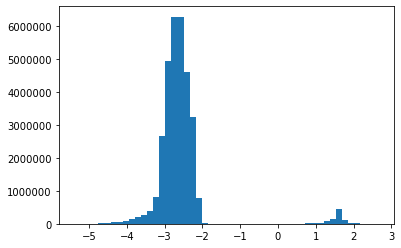

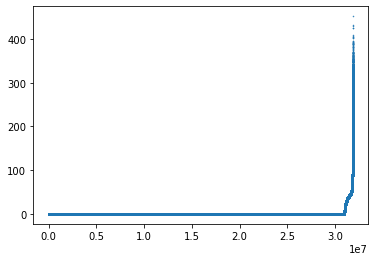

In [34]:
# study opacities

opac1d = c5dstar_opacities.ravel()

import matplotlib.pyplot as plt


opac1d = 10**np.round(np.log10(opac1d))

plt.figure(1)
plt.hist(np.log10(opac1d), bins=50);

plt.figure(2)
plt.plot(np.sort(opac1d),'.',markersize=1)




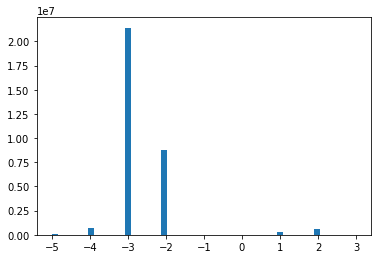

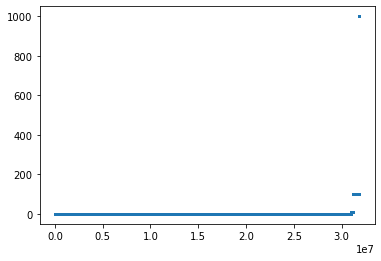

In [35]:
# Rounding opacities to nearest ten-number gives 6 different species
# for the star that is

opac1d = 10**np.round(np.log10(opac1d))

plt.figure(1)
plt.hist(np.log10(opac1d), bins=50);

plt.figure(2)
plt.plot(np.sort(opac1d),'.',markersize=1)

# problemet kvarstår att jag har bara "ett värde" här per cell
# det ska ju vara ett våglängdsberoende, så vad är detta kappa?

# annars, till senare
# översätt 3d-arrayen till r3d-data-lista i r3d-gridet
# gör denna avrudningen fast i r3d-listan istället
# tack vare listorna med griddistances så vet jag vilken cell som är vilken ju
# då kan jag använda detta för att dela upp listan i dust_densities_star.inp's
# till flera olika species
# > i en specie så är det 0 g/cm3 i de celler där en annan specie huserar.





In [2]:
# Create r3d-grid to use for my tests
# in case I need a grid with cellsizes in relation to c5d cellsizes

import create_r3d_functions as c3d
import analyze_r3d_functions as a3d
import analyze_co5bold_functions as a5d
import numpy as np
from scipy.io.idl import readsav

AUcm = 1.49598e13 # cm

# Load all necessary details from c5d-data
c5dgrid = a5d.load_grid_coordinates()
nc5dedge = np.size(c5dgrid[:,0])
nc5dcube = nc5dedge**3

c5dcellsize,c5dcourners = a5d.load_grid_cellsizes()


# Set settings for new grid, in this specific case:
# (normally, plot and check the density distribution against R)
# (or later, just use the same size of the grid, set some good refinement
#  limits)
# 6AU side (the star seems to end at R=2AU so 3AU is good enough for this test)
# smallest grid cells are c5dcellsize > basecells are c5dcellsize*2**4
#r3dedge = 2*5*AUcm
#nxyz = 10
#refinementlist = [0.8*r3dedge,0.6*r3dedge,0.4*r3dedge,0.2*r3dedge]
#refinementlist_au = [refs/AUcm for refs in refinementlist]

# Use these for adapting cell sizes to c5d cell sizes
r3dedge = 2 * 3.5 * AUcm
basecell = c5dcellsize*1.1 * 2**4
nxyz = r3dedge/basecell
refinementlist_au = [3.5,2.9,2.3,1.7]
refinementlist = [refs*AUcm for refs in refinementlist_au]

# Create new smaller grid
# Mind that create-grid function automatically adapts nxyz and gridedge so that
# nxyz is an even integer and cell sizes are kept as set in the initial settings
c3d.create_grid(r3dedge/AUcm, nxyz, refinementlist_au, savegrid=True)




Creating amr_grid with octree refinement.
Final length of total side of whole grid: 7.262420974257731 AU
Number of base cells along one side of the grid: 18
Distances to refinement limits from centrum: [3.5, 2.9, 2.3, 1.7] AU
Number refinements: 4
Size of base cell: 0.40346783190320734 AU
Child cell size 1: 0.20173391595160367 AU
Child cell size 2: 0.10086695797580184 AU
Child cell size 3: 0.05043347898790092 AU
Child cell size 4: 0.02521673949395046 AU
Writing amr_grid.inp
Finished amr_grid.inp
Writing grid_distances.csv and grid_cellsizes.csv
(Not necessary for Radmc3d, but useful for pre/portprocessing of your model. They have the same order as dust_densities.inp)
Finished grid_distances.csv
Finished grid_cellsizes.csv
Writing grid_info.txt
Finished grid_info.txt
Create grid: done.



In [1]:
import analyze_co5bold_functions as a5d
a5d.create_star()


Loading R3D grid
Loading C5D grid properties
Loading C5D star properties (density, temperature, opacity)
Translating C5D data to R3D data
Finished 25 per cent of the grid.
Finished 50 per cent of the grid.
Finished 75 per cent of the grid.
C5D Dust-star: done.



In [2]:

import create_r3d_functions as c3d
import analyze_r3d_functions as a3d
import analyze_co5bold_functions as a5d
import numpy as np
from scipy.io.idl import readsav


# Extract final grid props
print('Loading R3D grid')
nxyz,nrefines,nleafs,nbranch,gridedge = a3d.load_gridprops()
r3ddistances = a3d.load_griddistances()
r3dcellsizes = a3d.load_cellsizes()



print('Loading C5D grid properties')
c5dcellsize,c5dcourners = a5d.load_grid_cellsizes()
c5dgrid = a5d.load_grid_coordinates()

# Load temperatures
#Tstar = teststar['EOS'][0][0][1][x][y][z]

savpath='../co5bold_data/dst28gm06n056/st28gm06n056_140.sav'
c5ddata = readsav(savpath)
c5ddata = c5ddata['ful']

nc5dedge = int(np.size(c5ddata['Z'][0][0][16]))

c5dstar_temperatures = np.zeros((nc5dedge,nc5dedge,nc5dedge))

# Extract densities
for nx in range(nc5dedge):
    for ny in range(nc5dedge):
        for nz in range(nc5dedge):
            c5dstar_temperatures[nx,ny,nz] = c5ddata['EOS'][0][0][1][nx][ny][nz]


# Start working :)


# Declare stuff for the loops
stararray = np.zeros(nleafs)

# Matrix with info on if c5d cells are done or not
c5dcell_list = np.zeros((nc5dedge,nc5dedge,nc5dedge))

# Counters
progbar = 0

nc5dedge

# Extract total range of r3dgrid
# TODO varför har jag denna här? ville jag göra nån koll så att gridet är större eller mindre
# än c5d-gridet?
#r3dcourners = [-0.5*gridedge,0.5*gridedge]

# Constant adaptive range used for when minimum cellsizes are similar
adaptive_range = c5dcellsize/r3dcellsizes.min() * 1.2



# TODO solve the xyz-zero-plane bug
# no problem when r3dgridcell4 > c5dgridcell
# otherwise, when I get 0-cells (ie else on if nchildcells > 0)
# take the average value of surrounding c5dcells
# > now I get cells with somewhat lower density that surrounding cells


if r3dcellsizes.min() < c5dcellsize:
    print('\nERROR\n    R3D grids resolution is higher than C5D grid, stopping\n    Change your R3D grid\n')

else:
    # Otherwise loop over r3d grid
    for nr3d in range(nleafs):

        # Extract size range for current r3dcell
        r3dxrange = [
            r3ddistances[nr3d,1]-0.5*r3dcellsizes[nr3d],
            r3ddistances[nr3d,1]+0.5*r3dcellsizes[nr3d]
        ]
        r3dyrange = [
            r3ddistances[nr3d,2]-0.5*r3dcellsizes[nr3d],
            r3ddistances[nr3d,2]+0.5*r3dcellsizes[nr3d]
        ]
        r3dzrange = [
            r3ddistances[nr3d,3]-0.5*r3dcellsizes[nr3d],
            r3ddistances[nr3d,3]+0.5*r3dcellsizes[nr3d]
        ]   

        # Extract indeces of all c5dcells within current r3dcell
        c5dxrange = np.argwhere(r3dxrange[0] <= c5dgrid[np.argwhere(c5dgrid[:,0] <= r3dxrange[1]),0])[:,0]
        c5dyrange = np.argwhere(r3dyrange[0] <= c5dgrid[np.argwhere(c5dgrid[:,1] <= r3dyrange[1]),1])[:,0]
        c5dzrange = np.argwhere(r3dzrange[0] <= c5dgrid[np.argwhere(c5dgrid[:,2] <= r3dzrange[1]),2])[:,0]

        # Number of c5dcells within r3dcell
        nchildcells = c5dxrange.size*c5dyrange.size*c5dzrange.size

        if nchildcells < 1:
            # Sometimes when r3dcellsize ~ c5dcellsize this scheme doesn't find corresponding cells
            # then I need to temporarily increase the range of the cell sizes
            temprange = [r3dxrange[0]*adaptive_range,r3dxrange[1]*adaptive_range]
            c5dxrange = np.argwhere(temprange[0] <= c5dgrid[np.argwhere(c5dgrid[:,0] <= temprange[1]),0])[:,0]
            temprange = [r3dyrange[0]*adaptive_range,r3dyrange[1]*adaptive_range]
            c5dyrange = np.argwhere(temprange[0] <= c5dgrid[np.argwhere(c5dgrid[:,1] <= temprange[1]),1])[:,0]
            temprange = [r3dzrange[0]*adaptive_range,r3dzrange[1]*adaptive_range]
            c5dzrange = np.argwhere(temprange[0] <= c5dgrid[np.argwhere(c5dgrid[:,2] <= temprange[1]),2])[:,0]

            # Number of c5dcells within r3dcell
            nchildcells = c5dxrange.size*c5dyrange.size*c5dzrange.size

        # Then loop through this range
        for nnz in c5dzrange:
            for nny in c5dyrange:
                for nnx in c5dxrange:

                    # Sum all densities
                    stararray[nr3d] += c5dstar_temperatures[nnx,nny,nnz]
        
        # Average the density
        stararray[nr3d] /= nchildcells


        # Some progress bar info
        if int(nr3d/nleafs*100) == 25 and progbar == 0:
            progbar += 1
            print('Finished 25 per cent of the grid.')

        if int(nr3d/nleafs*100) == 50 and progbar == 1:
            progbar += 1
            print('Finished 50 per cent of the grid.')

        if int(nr3d/nleafs*100) == 75 and progbar == 2:
            progbar += 1
            print('Finished 75 per cent of the grid.')

    print('Writing dust_temperature_star.dat')

    # Open data files
    with open('../dust_temperature_star.dat', 'w') as f:

        # Write header
        # 1
        # nleafs
        # number dust species
        f.write(f'1\n{int(nleafs)}\n1\n')

        # Do I need to have an array? Can I incorporate this above?
        # Or if I want to have several data at once, perhaps this needs
        # to be an array?
        for nr3d in range(nleafs):
            f.write(f'{stararray[nr3d]}\n')





    print('C5D temperature star: done.\n')

Loading R3D grid
Loading C5D grid properties
Finished 25 per cent of the grid.
Finished 50 per cent of the grid.
Finished 75 per cent of the grid.
Writing dust_temperature_star.inp
C5D temperature star: done.



/home/joachim/exwings/exwings-codes/analyze_r3d_functions.py:498: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


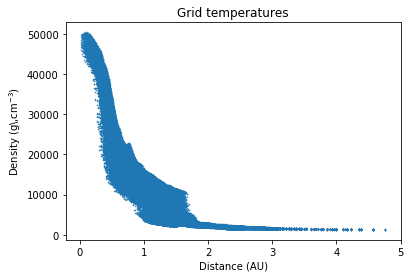

In [2]:
import analyze_r3d_functions as a3d
import matplotlib.pyplot as plt

a3d.plot_temperature_radius(temperature_path='../dust_temperature_star.dat')





/home/joachim/exwings/exwings-codes/analyze_r3d_functions.py:379: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


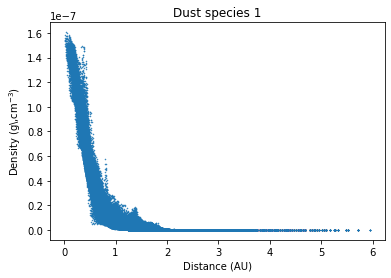

In [1]:
import analyze_r3d_functions as a3d

a3d.plot_onedensity_radius(density_path='../dust_density_star.inp')



In [114]:
# Notebook for exploring the data insize the sav-file

import numpy as np
import matplotlib.pyplot as plt
from scipy.io.idl import readsav

AUcm = 1.49598e13 # cm

teststar = readsav('../co5bold_data/dst28gm06n052/st28gm06n052_186.sav')
teststar = teststar['ful']

# Dict-columns
print(teststar.dtype.names)
print('\n\n')

# Size of grid
print(np.shape(teststar['EOS'][0][0][0]))

# Number of cells along each axis
#print(teststar['Z'][0][0][4])

# Total time(?)
#print(f"{teststar['Z'][0][0][7]} {teststar['Z'][0][0][8]}")
# Also
#print(teststar['MODELTIME'],' ',teststar['MODELTIME__UNIT'])



#nn=0

#print(teststar['PAR'])
#print(np.shape(teststar['OPA'][0][0][0]))

#print(teststar['EOS'][0][0][nn+2])

#import matplotlib.pyplot as plt
#plt.plot(teststar['EOS'][0][0][0][0][0],'b.')
#plt.plot(teststar['OPA'][0][0][0][0][0],'r.',markersize=1)



('TYPE', 'HEAD', 'DATASET_ID', 'DATASET_ID__UNIT', 'DATASET_ID__NAME', 'MODELTIME', 'MODELTIME__UNIT', 'MODELTIME__NAME', 'MODELTIME_DB', 'MODELTIME_DB__UNIT', 'MODELTIME_DB__NAME', 'MODELITIME', 'MODELITIME__UNIT', 'MODELITIME__NAME', 'DTIME', 'DTIME__UNIT', 'DTIME__NAME', 'TIME_OUT_FULL_LAST', 'TIME_OUT_FULL_LAST__UNIT', 'TIME_OUT_FULL_LAST__NAME', 'TIME_OUT_MEAN_LAST', 'TIME_OUT_MEAN_LAST__UNIT', 'TIME_OUT_MEAN_LAST__NAME', 'Z', 'EOS', 'OPA', 'PAR')





In [112]:
teststar

{'ful': rec.array([(b'uio', rec.array([(b'uio', b'rhd-data', array([b'RHD-simulation'], dtype=object), array([b'Produced by sphereintegrate.pro: Thu Jan 16 12:27:56 2003',
        b'RHD-simulation: 16.01.2003 13:58:53.179 - 18.01.2003 15:29:36.521',
        b'  with version RHD 002.00.2002.12.29',
        b'  on system HP-UX, machine gunnar, hardware ia64',
        b'RHD-simulation: 21.01.2003 13:59:29.938 - 24.01.2003 07:35:53.475',
        b'  with version RHD 002.00.2002.12.29',
        b'  on system HP-UX, machine gunnar, hardware ia64',
        b'RHD-simulation started at 24.01.2003 19:32:32.388', b'...',
        b'  with version RHD 003.03.2020.02.06',
        b'  on system Linux, machine r72.uppmax.uu.se, hardware x86_64',
        b'RHD-simulation: 23.05.2021 20:49:07.199 - 24.05.2021 09:05:02.327',
        b'  with version RHD 003.03.2020.02.06',
        b'  on system Linux, machine r72.uppmax.uu.se, hardware x86_64',
        b'RHD-simulation: 24.05.2021 09:05:37.162 - 24.05.20